<table align="left">
  <td>
    <a href="https://is.gd/fLFVwG" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Clasificador - conjunto de datos CIFAR-10

Se utilizará una red neuronal fully connected para clasificar imágenes de 32x32x3 (RGB) en 10 clases.

El conjunto de datos CIFAR-10 consta de 60000 imágenes en color de 32x32 en 10 clases, con 6000 imágenes por clase. Hay 50000 imágenes de entrenamiento y 10000 de prueba.

El conjunto de datos se divide en cinco lotes de entrenamiento y un lote de prueba, cada uno con 10000 imágenes. 
- El lote de prueba contiene exactamente 1000 imágenes seleccionadas al azar de cada clase. 
- Los lotes de entrenamiento contienen el resto de imágenes en orden aleatorio, pero algunos lotes de entrenamiento pueden contener más imágenes de una clase que de otra. Entre ellos, los lotes de entrenamiento contienen exactamente 5000 imágenes de cada clase.

Referencias: https://www.cs.toronto.edu/~kriz/cifar.html

<a href="https://imgbb.com/"><img src="https://i.ibb.co/SXtPQzj/CIFAR10.png" alt="CIFAR10" border="0"></a>

## **Paso 1.** Importar las librerías necesarias 

In [1]:
import tensorflow as tf
from tensorflow import keras
# Common imports
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

# to make this notebook's output stable across runs
np.random.seed(42)

## **Paso 2.** Cargar el conjunto de datos CIFAR-10

Se cargan los datos de entrenamiento y prueba y se escala la intensidad de los píxeles en el rango de 0-1 y se convierten en flotantes, dividiéndolos por 255.


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
#normalizing inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

### **Paso 2.1.** Visualizar las imágenes del conjunto de datos

In [3]:
# initialize the label names for the CIFAR-10 dataset
class_names = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]
print(class_names[y_train[0][0]])

frog


In [4]:
print(X_train[0].shape)

(32, 32, 3)


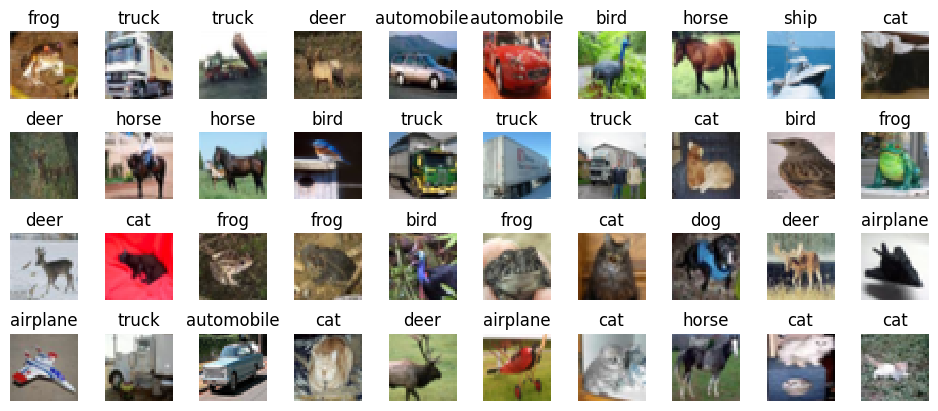

In [5]:
#Imagenes del dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [6]:
#Definicion de la red neuronal
num_classes = 10

## **Paso 3.** Construir la red neuronal

### **Paso 3.1.** Definir la arquitectura de la red neuronal

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(Dropout(0.2)) 
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(Dropout(0.2)) 
model.add(keras.layers.Dense(512, activation="relu"))
model.add(Dropout(0.2)) 
model.add(keras.layers.Dense(256, activation="relu"))
model.add(Dropout(0.2)) 
model.add(keras.layers.Dense(128, activation="relu"))
model.add(Dropout(0.2)) 
model.add(keras.layers.Dense(64, activation="relu"))
model.add(Dropout(0.2)) 
model.add(keras.layers.Dense(num_classes, activation="softmax"))

### **Paso 3.2.** Compilar la red neuronal


*   **loss**: "sparse_categorical_crossentropy", se utiliza está función dado que se cuenta con un número de etiquetas escasas (sparse) - no binarias. (Binarias: categorical_crossentropy) - [Referencia.](https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other)
*   **optimizer** = Adam. 
*   **metrics**: dado que el modelo se utiliza para clasificar la información, se utiliza la exactitud del modelo durante el entrenamiento y la evaluación. 

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **Paso 3.3.** Entrenar la red neuronal

- **epochs**: número de iteraciones sobre el conjunto de datos de entrenamiento.
- **batch_size**: número de muestras por gradiente de actualización.
- **validation_data**: datos de validación para monitorear la pérdida y las métricas de exactitud del modelo. El modelo no se entrena con estos datos.
- **verbose**: 0 = no se muestra nada, 1 = muestra el progreso de la barra de progreso, 2 = muestra una línea por época.

In [9]:
simple_model_history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 2.1110 - accuracy: 0.1968 - val_loss: 1.9185 - val_accuracy: 0.2868
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.9387 - accuracy: 0.2852 - val_loss: 1.8230 - val_accuracy: 0.3441
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 1.8894 - accuracy: 0.3073 - val_loss: 1.8202 - val_accuracy: 0.3430
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 1.8602 - accuracy: 0.3219 - val_loss: 1.7617 - val_accuracy: 0.3725
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 1.8343 - accuracy: 0.3351 - val_loss: 1.7478 - val_accuracy: 0.3772
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 1.8120 - accuracy: 0.3460 - val_loss: 1.7248 - val_accuracy: 0.3982
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 1.7982 - accuracy: 0.3524 - val_loss: 1.7181 - val_accuracy: 0.3987
Epoch 

## **Paso 4.** Evaluar el modelo

* Loss = Perdida ()
* Accuracy = Exactitud ()

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.6322 - accuracy: 0.4229


[1.6322273015975952, 0.42289999127388]

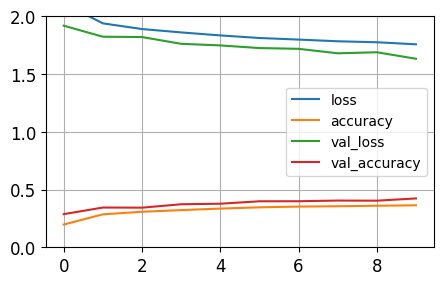

In [12]:
# se utiliza pandas para visualizar la información almacenada en el diccionario de historia de entrenamiento y graficarla. 
import pandas as pd

pd.DataFrame(simple_model_history.history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [13]:
def plot_training_curves(history):
    """
    Plot training curves for accuracy and loss metrics.
    Args: 
        history object from model.fit()
    Returns: 
        Plot of training/validation loss and accuracy curves


    """
    # Plot training & validation accuracy values

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    plt.subplot(2, 1, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model Training Curves')
    plt.ylabel('Accuracy')
    #plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.grid(True)
    # Plot training & validation loss values
    plt.subplot(2, 1, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    #plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.grid(True)
    plt.show()

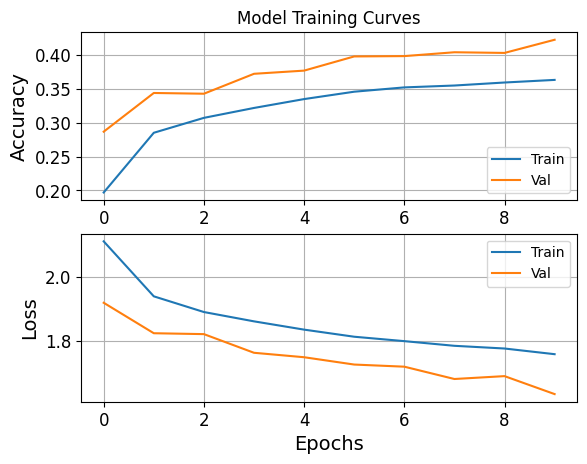

In [14]:
plot_training_curves(simple_model_history)

## **Paso 5.** Visualizar las predicciones
Se toman 5 instancias del set de prueba para hacer la predicción. y se imprime la matriz de probabilidad para cada una de las instancias. 

In [150]:
X_new = X_test[0:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.03, 0.01, 0.18, 0.22, 0.12, 0.22, 0.12, 0.04, 0.04, 0.02],
       [0.13, 0.12, 0.01, 0.01, 0.02, 0.  , 0.  , 0.02, 0.35, 0.33],
       [0.23, 0.07, 0.03, 0.02, 0.05, 0.01, 0.01, 0.02, 0.49, 0.07],
       [0.17, 0.03, 0.05, 0.05, 0.05, 0.03, 0.01, 0.02, 0.56, 0.03],
       [0.02, 0.  , 0.27, 0.05, 0.33, 0.06, 0.23, 0.04, 0.01, 0.  ]],
      dtype=float32)

### **Paso 5.1.** Visualizar las predicciones

In [151]:
classes_x = np.argmax(y_proba,axis=1)
np.array(class_names)[classes_x]

array(['dog', 'ship', 'ship', 'ship', 'deer'], dtype='<U10')

### **Paso 5.2.** Visualizar los valores reales

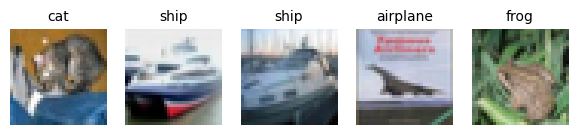

In [152]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index][0]], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()